In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [30]:
dfy = pd.read_csv('datayoutube.csv')
dfy

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433
5,6th,A++,Movieclips,30243,17149705,16618094724
6,7th,A++,netd müzik,8500,11373567,23898730764
7,8th,A++,ABS-CBN Entertainment,100147,12149206,17202609850
8,9th,A++,Ryan ToysReview,1140,16082927,24518098041
9,10th,A++,Zee Marathi,74607,2841811,2591830307


In [31]:
dfy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
Rank             5000 non-null object
Grade            5000 non-null object
Channel name     5000 non-null object
Video Uploads    5000 non-null object
Subscribers      5000 non-null object
Video views      5000 non-null int64
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


In [32]:
dfyc = dfy.copy()
dfyc['Video Uploads'] = pd.to_numeric(dfyc['Video Uploads'], errors = 'coerce')    
dfyc['Subscribers'] = pd.to_numeric(dfyc['Subscribers'], errors = 'coerce')

In [33]:
#valor maximo 
dfyc.max()

Rank                     9th
Grade                       
Channel name            흔한남매
Video Uploads         422326
Subscribers      6.59953e+07
Video views      47548839843
dtype: object

In [34]:
#valor minimo
dfyc.min()

Rank                       1,000th
Grade                           A 
Channel name     #Desenhos Kids BR
Video Uploads                    1
Subscribers                    301
Video views                     75
dtype: object

In [35]:
#transforma valores em branco em vazio (null)
def transformaVazio(x):
    if x is not None:
        if x.strip():
            return x
    
dfyc['Grade'] = dfyc['Grade'].apply(lambda x: transformaVazio(x))

dfyc.isnull().sum()


Rank               0
Grade              6
Channel name       0
Video Uploads      6
Subscribers      387
Video views        0
dtype: int64

In [36]:
#correlação
dfyc.corr()

,Video Uploads,Subscribers,Video views
Video Uploads,1.000000,0.011362,0.092436
Subscribers,0.011362,1.000000,0.791281
Video views,0.092436,0.791281,1.000000


In [37]:
#normalizando dataframe

normalizado = pd.DataFrame(dfyc[['Video Uploads', 'Subscribers', 'Video views']])
normalizado = (normalizado-normalizado.min())/(normalizado.max()-normalizado.min())
normalizado.head()

,Video Uploads,Subscribers,Video views
0,0.195953,0.284153,0.438913
1,0.029977,0.927282,1.000000
2,0.000881,0.291506,0.205963
3,0.064694,0.472464,0.476898
4,0.087030,0.497796,0.552562


In [38]:
#dataframe completo com dados normalizados
dfnovo = pd.concat( [dfyc.drop(['Video Uploads', 'Subscribers', 'Video views'], axis=1), normalizado], axis=1 )


In [39]:
dfnovo

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,0.195953,0.284153,0.438913
1,2nd,A++,T-Series,0.029977,0.927282,1.000000
2,3rd,A++,Cocomelon - Nursery Rhymes,0.000881,0.291506,0.205963
3,4th,A++,SET India,0.064694,0.472464,0.476898
4,5th,A++,WWE,0.087030,0.497796,0.552562
5,6th,A++,Movieclips,0.071608,0.259859,0.349495
6,7th,A++,netd müzik,0.020124,0.172335,0.502614
7,8th,A++,ABS-CBN Entertainment,0.237130,0.184088,0.361788
8,9th,A++,Ryan ToysReview,0.002697,0.243695,0.515640
9,10th,A++,Zee Marathi,0.176655,0.043056,0.054509


In [40]:
#verifica se há valores null
dfnovo.isnull().sum()

Rank               0
Grade              6
Channel name       0
Video Uploads      6
Subscribers      387
Video views        0
dtype: int64

In [41]:
#media dos inscritos
dfnovo['Subscribers'].mean()

0.039695473553201265

In [97]:
#substituindo valores NaN pela media
dfnovo['Subscribers'].fillna(value = dfnovo['Subscribers'].mean(), inplace=True)

In [95]:
#substituindo valores NaN pela media
dfnovo['Video Uploads'].fillna(value = dfnovo['Video Uploads'].mean(), inplace=True)

In [44]:
#salvando arquivo
dfnovo.to_csv('file.csv')

In [45]:
#correlacao do dataframe gerado
dfnovo.corr()

,Video Uploads,Subscribers,Video views
Video Uploads,1.000000,0.011329,0.092423
Subscribers,0.011329,1.000000,0.784449
Video views,0.092423,0.784449,1.000000


In [46]:
# correlação do dataframe normalizado
normalizado.corr()

,Video Uploads,Subscribers,Video views
Video Uploads,1.000000,0.011362,0.092436
Subscribers,0.011362,1.000000,0.791281
Video views,0.092436,0.791281,1.000000


In [47]:
# 5 canais do youtube com mais inscritos
dfyc.sort_values(['Subscribers'], ascending=False).head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
1470,"1,471st",A-,PewDiePie,3601.0,65995310.0,18684630003
1,2nd,A++,T-Series,12661.0,61196302.0,47548839843
11,12th,A+,Canal KondZilla,822.0,39409726.0,19291034467
174,175th,A,Dude Perfect,185.0,34489432.0,6095981611
3222,"3,223rd",B+,HolaSoyGerman.,137.0,34480357.0,3617584451


In [67]:
#dados dos canais que nao possuem grau de classificação
dfyc[dfyc['Grade'].isnull()]

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
267,268th,None,MidnightXChannel,NaN,NaN,190256974
517,518th,None,Dusama Pets TV,NaN,NaN,91601494
2323,"2,324th",None,Random,NaN,12275.0,17897584
3072,"3,073rd",None,Boram Tube Toy Shcool [보람튜브…,NaN,726527.0,205555289
3247,"3,248th",None,atheer sultan,NaN,NaN,79663674
4898,"4,899th",None,ExzoticSlice,NaN,99785.0,9745292


Percentual dos canais da base
class1: 0.20%
class2: 0.82%
class3: 19.26%
class4: 20.48%
class5: 59.12%
class6:  0.12%
------------------------
Legenda:
Classe1:  A++ 
Classe2:  A+ 
Classe3:  A 
Classe4:  A- 
Classe5:  B+ 
Classe6: Sem classificacao


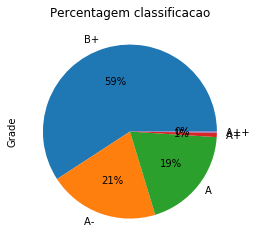

In [76]:
#porcentagem de cada canal baseado em seu grau de classificação

class1 = (dfyc[dfyc['Grade'] == 'A++ '].count() / 5000) * 100
class2 = (dfyc[dfyc['Grade'] == 'A+ '].count() / 5000) * 100
class3 = (dfyc[dfyc['Grade'] == 'A '].count() / 5000) * 100
class4 = (dfyc[dfyc['Grade'] == 'A- '].count() / 5000) * 100
class5 = (dfyc[dfyc['Grade'] == 'B+ '].count() / 5000) * 100
class6 = (dfyc['Grade'].isnull().sum() / 5000) * 100

lista = [class1, class2, class3, class4, class5, class6]
print('Percentual dos canais da base')
for x in range(0, 5):
    print('class' + str(x+1) + ':',  str("%.2f" %lista[x][0]) + '%')

print('class6: ',  str("%.2f" %lista[5]) + '%')

print('------------------------')

print('Legenda:\nClasse1:  A++ \nClasse2:  A+ \nClasse3:  A \nClasse4:  A- \nClasse5:  B+ \nClasse6: Sem classificacao')

dfyc[dfyc['Grade'].notnull()]['Grade'].value_counts().plot.pie(title="Percentagem classificacao", autopct='%.0f%%')


In [94]:
#media de inscritos de canais classificados como A++ (Top)

media = dfyc[dfyc['Grade'] == 'A++ ']['Subscribers'].mean()
print('média: ', media)

média:  22281762.5


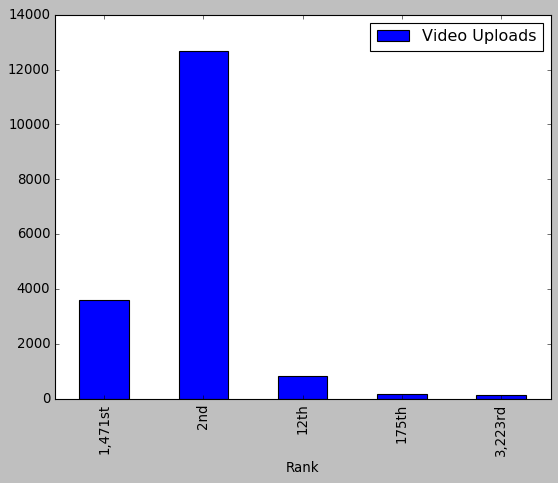

In [91]:
#Quantidade de videos postados pelos maiores canais da base
plt.style.use('classic')
maiores_canais = dfyc.sort_values(['Subscribers'], ascending=False).head()
maiores_canais.set_index('Rank', inplace=True)
maiores_canais.drop(['Grade', 'Channel name', 'Subscribers', 'Video views'], axis=1).plot.bar() #aqui mostrando todos os dados do dataframe, sem a coluna matricula